In [50]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
plt.style.use("dark_background")

In [62]:
mpl.rcParams['figure.figsize'] = 20, 10

In [11]:
def gaussian_kernel(x, x0, h):
    return np.exp(- 0.5 * np.power((x - x0) / h, 2) )

In [4]:
x_in = np.loadtxt("./xin")
y_in = np.loadtxt("./yin")

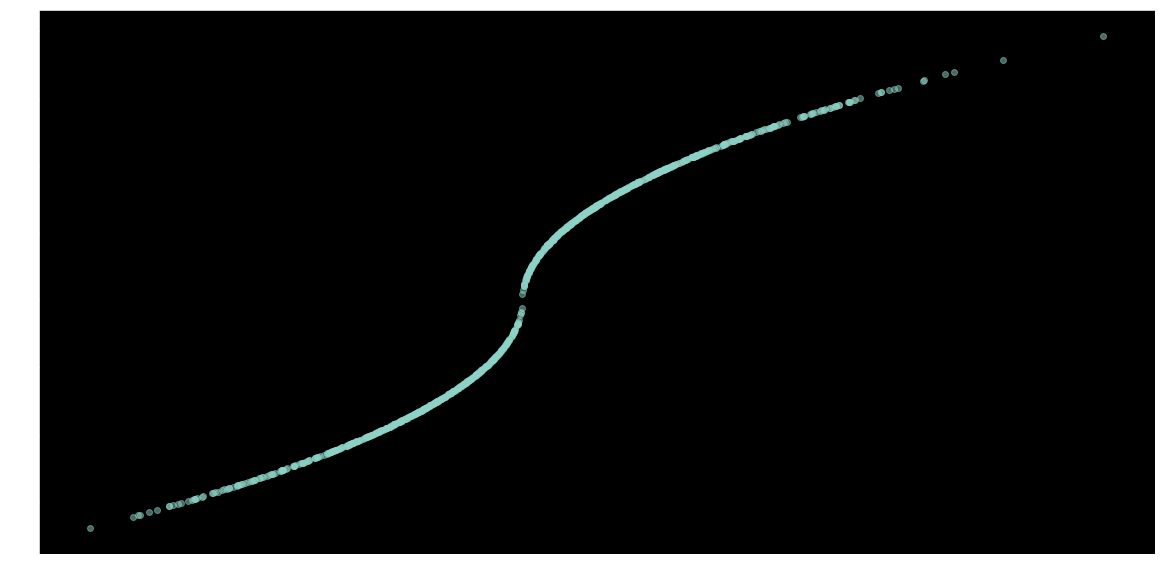

In [63]:
plt.figure()
plt.scatter(x=x_in, y=y_in, alpha=0.5)
plt.show()

In [6]:
# def split_train_test(x, y, folds):
#     if len(x) != len(y):
#         raise ValueError("X and Y Should have same length")
#     num_test = int(len(x) / float(folds)) 
#     num_train = len(x) - num_test
#     print(num_test, num_train)
#     indices = np.random.permutation(x.shape[0])
#     training_idx, test_idx = indices[:num_train], indices[num_train:]
#     return x[training_idx], x[test_idx], y[training_idx], y[test_idx]

In [7]:
def split_k_fold(x, y, folds):
    if len(x) != len(y):
        raise ValueError("X and Y Should have same length")
    indices = np.arange(len(x))
    np.random.shuffle(indices)
    split_size = len(x) / folds
    return np.array([x[n * split_size:(n + 1) * split_size] for n in np.arange(folds)]), np.array(
        [y[n * split_size:(n + 1) * split_size] for n in np.arange(folds)])

In [8]:
x_splits, y_splits = split_k_fold(x_in, y_in, 10)

In [9]:
num_folds = 10

In [43]:
def estimator(x_test, x_train, y_train, h):
    if len(x_train) != len(y_train):
        raise ValueError("X and Y Should have same length")
    B = np.array([np.ones(len(x_train)), x_train]).T
    y_hat = []
    for x0 in x_test:
        W = np.diag(gaussian_kernel(x_train , x0, h))
        y_hat.append(np.array([1, x0]).T.dot(
            np.linalg.inv(B.T.dot(W).dot(B))).dot(
            B.T).dot(W).dot(y_train))
    
    return np.array(y_hat)

In [81]:
fold_indices = np.arange(num_folds)
h_values = np.linspace(0.1, 2.0, 20)
mse_values = []

for h in h_values:
    print("Fitting for h = ", h)
    mses = []
    for idx in fold_indices:
        test_idx = idx
        train_idx = np.setdiff1d(fold_indices, [idx])
        train_x, test_x, train_y, test_y = (np.concatenate(x_splits[train_idx]), 
                                            x_splits[test_idx], 
                                            np.concatenate(y_splits[train_idx]), 
                                            y_splits[test_idx])
        test_y_hat = estimator(test_x, train_x, train_y, h)
        mses.append(np.mean(np.power(test_y_hat - test_y, 2)))
    mse_values.append(np.mean(mses))        

('Fitting for h = ', 0.1)
('Fitting for h = ', 0.2)
('Fitting for h = ', 0.3)
('Fitting for h = ', 0.4)
('Fitting for h = ', 0.5)
('Fitting for h = ', 0.6)
('Fitting for h = ', 0.7)
('Fitting for h = ', 0.7999999999999999)
('Fitting for h = ', 0.8999999999999999)
('Fitting for h = ', 0.9999999999999999)
('Fitting for h = ', 1.0999999999999999)
('Fitting for h = ', 1.2)
('Fitting for h = ', 1.3)
('Fitting for h = ', 1.4)
('Fitting for h = ', 1.5)
('Fitting for h = ', 1.5999999999999999)
('Fitting for h = ', 1.7)
('Fitting for h = ', 1.8)
('Fitting for h = ', 1.9)
('Fitting for h = ', 2.0)


In [84]:
h_fitted = h_values[np.argmin(mse_values)]
h_fitted

0.1

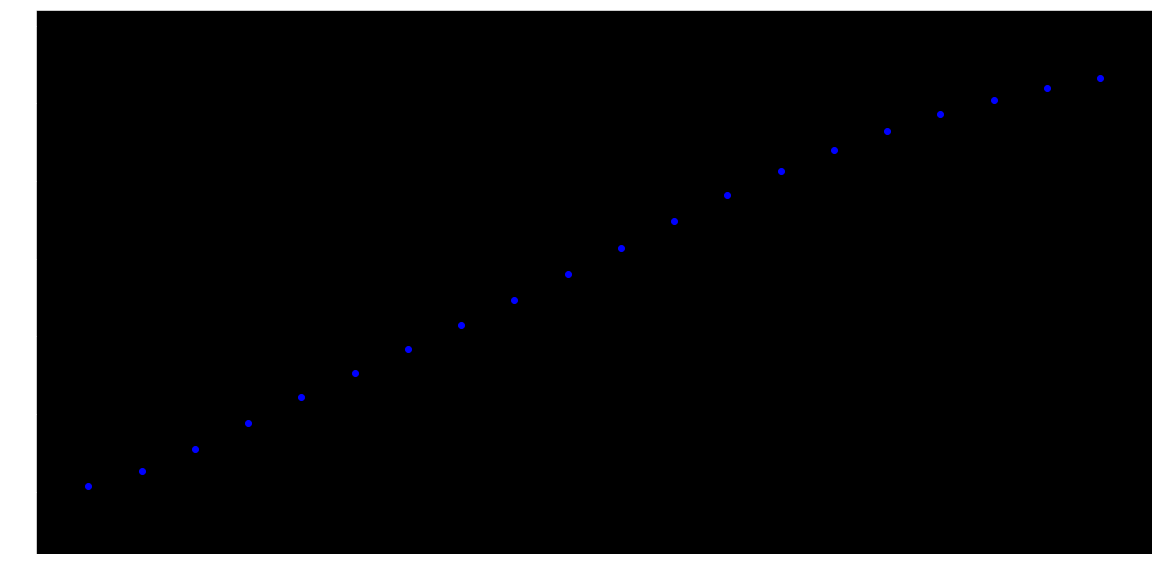

In [86]:
plt.figure()
plt.scatter(x=h_values, y=mse_values, color='b')
plt.show()

In [87]:
y_pred = estimator(x_in, x_in, y_in, h_fitted)

In [92]:
sorted_idx = np.argsort(x_in)

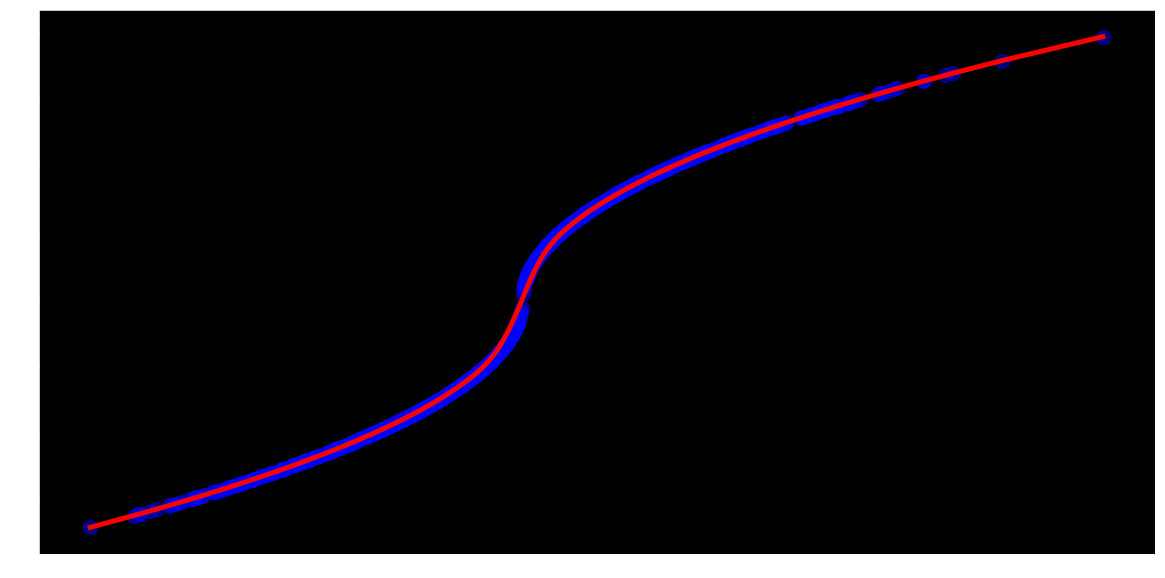

In [98]:
plt.figure()
plt.scatter(x=x_in, y=y_in, alpha=0.5, color='b', s=200)
plt.plot(x_in[sorted_idx], y_pred[sorted_idx], color='r', linewidth=5)
plt.show()